# Quiz Project Streamlit: 
- **Nama:** Nathanael Berliano Novanka Putra
- **Dataset:** 515K Hotel Reviews Data in Europe - This dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe. Meanwhile, the geographical location of hotels are also provided for further analysis. (https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe)

## Menentukan Pertanyaan Bisnis

- 1. Apa kategori kata-kata yang mendominasi dari review?
- 2. Aspek (feature) apa yang paling berpengaruh dalam proses klasifikasi data?

## Import Semua Packages/Library yang Digunakan

In [92]:
import pandas as pd
import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [93]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [94]:
!pip install --upgrade wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.3-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp39-cp39-win_amd64.whl (300 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python39\\site-packages\\wordcloud\\query_integral_image.cp39-win_amd64.pyd'
Check the permissions.



In [95]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [96]:
!pip install --upgrade Pillow==9.2.0

Defaulting to user installation because normal site-packages is not writeable


In [97]:
!pip install funcsigs

Defaulting to user installation because normal site-packages is not writeable


## Data Wrangling

### Gathering Data

In [151]:
reviews_df = pd.read_csv("../Hotel_Reviews.csv")

### Assessing Data

In [152]:
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]

reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [153]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
reviews_df.head()

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the roomNo...,0
374688,Pillows Nice welcoming and service,0
404352,No Negative Everything including the nice upgr...,0
451596,No Negative Lovely hotel v welcoming staff,0


### Cleaning Data

In [154]:
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
reviews_df.head()

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the room,0
374688,Pillows Nice welcoming and service,0
404352,Everything including the nice upgrade The Hot...,0
451596,Lovely hotel v welcoming staff,0


In [155]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [156]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [158]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [159]:

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)


reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [160]:
reviews_df.head()

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff


## Exploratory Data Analysis (EDA)

### Explore ...

In [161]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [162]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [163]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [164]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.246571,0.323906,-0.108685,0.194109,-0.221397
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,0.022929,0.136145,0.118239,-0.055612,-0.192101
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.042295,0.055422,0.165070,0.046581,-0.028752
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.010614,0.194923,0.009777,-0.132144,-0.032954
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.015207,0.078420,0.032393,-0.061310,-0.128296


In [165]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.246571,0.323906,-0.108685,0.194109,-0.221397
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,0.022929,0.136145,0.118239,-0.055612,-0.192101
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.042295,0.055422,0.165070,0.046581,-0.028752
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.010614,0.194923,0.009777,-0.132144,-0.032954
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.015207,0.078420,0.032393,-0.061310,-0.128296


In [166]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

In [167]:
# highest positive sentiment reviews
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


In [168]:
# lowest negative sentiment reviews
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


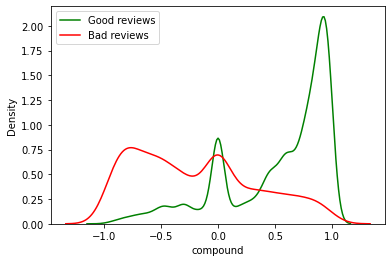

In [169]:
import seaborn as sns

palette = {0: "green", 1: "red"}

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist=False, label=label, color=palette[x])

plt.legend()

Graf di atas menunjukkan distribusi sentimen ulasan antara ulasan yang baik dan yang buruk. Dapat dilihat bahwa ulasan yang baik sebagian besar dianggap sangat positif oleh Vader. Sebaliknya, ulasan yang buruk cenderung memiliki skor sentimen komposit yang lebih rendah.

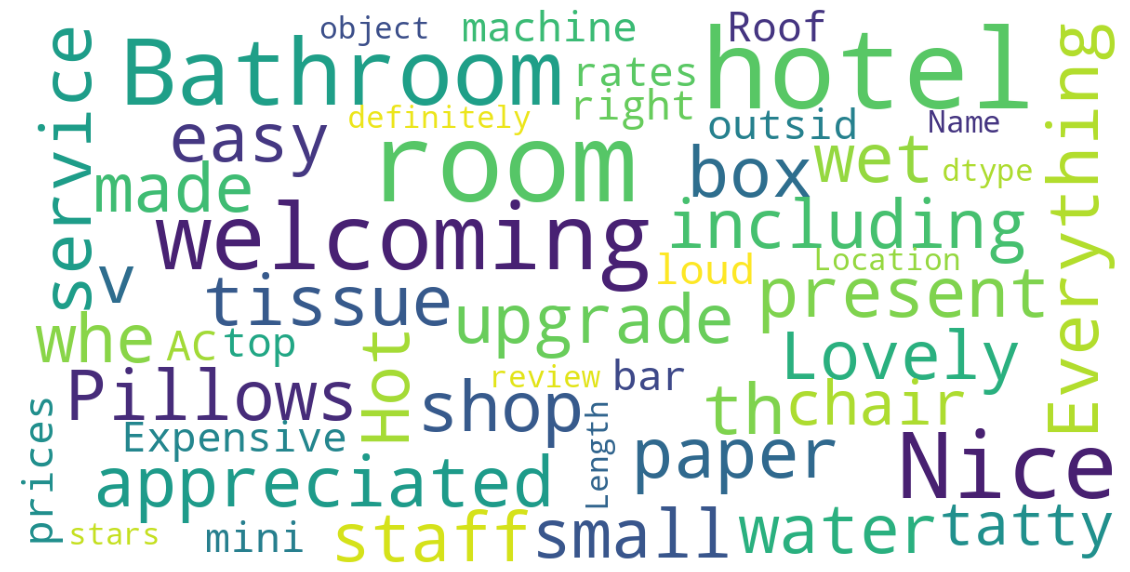

In [170]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(reviews_df["review"])

kata-kata yang mendominasi memiliki kaitan dengan *hotel*, termasuk kata-kata seperti "room" (kamar), "staff" (staf), "breakfast" (sarapan), dan sebagainya. Menunjukkan bahwa review analisis lebih banyak berfokus pada elemen-elemen terkait hotel.

Selain itu, adan kata yang berkaitan dengan pengalaman pelanggan selama menginap di hotel, seperti "perfect" (sempurna), "loved" (suka), "expensive" (mahal), "dislike" (tidak suka), dan sebagainya. Ini menunjukkan bahwa review juga mencakup aspek pengalaman pelanggan.

### Pertanyaan 2:

In [171]:
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [207]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)

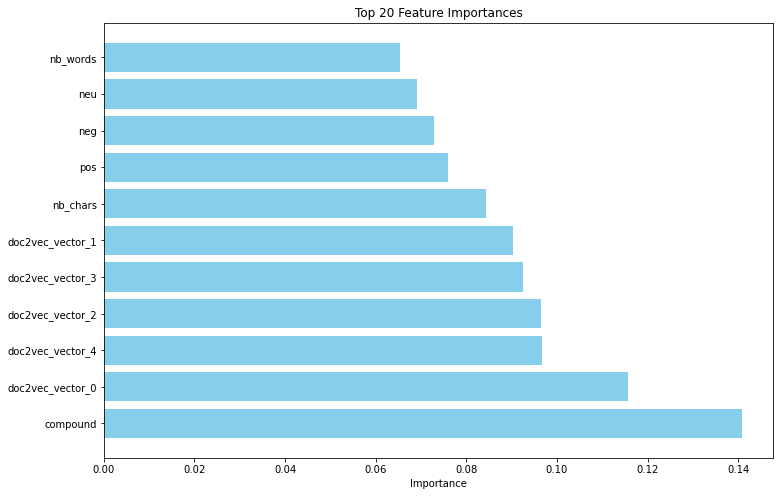

In [208]:
top_features = feature_importances_df.head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.show()

Berdasarkan grafik tersebut, "compound" merupakan feature yang paling penting/berpengaruh terhadap peforma dari model disusu dengan doc2vec_cevtor_0 dan doc2vec_cevtor_4

## Conclusion

- Conclution pertanyaan 1 : Kata yang mendominasi data berhubungan dengan ruangan dari hotel dan juga pengalaman pengguna selama menempati hotel
- Conclution pertanyaan 2 : compound adalah feature yang paling penting/berpengaruh terhadap model

## Model Export

In [175]:
import sklearn.externals
import joblib

joblib.dump(rf, 'Hotel_Review_Analysis_Model.pkl')

['Hotel_Review_Analysis_Model.pkl']

In [176]:
print(X_test)

          neg    neu    pos  compound  nb_chars  nb_words  doc2vec_vector_0  \
385524  0.000  0.490  0.510    0.6369        49         9          0.102412   
403309  0.000  0.682  0.318    0.4215        46        10          0.009596   
42185   0.000  0.609  0.391    0.9823       281        54         -0.081698   
286648  0.138  0.598  0.265    0.5984       174        31          0.106576   
109058  0.000  0.589  0.411    0.4201        39         6         -0.095483   
...       ...    ...    ...       ...       ...       ...               ...   
449356  0.000  0.575  0.425    0.5719        44         8          0.048707   
71411   0.000  0.752  0.248    0.5106        64        14         -0.010442   
132936  0.000  1.000  0.000    0.0000        59        12         -0.115727   
470512  0.000  0.624  0.376    0.8425       118        21         -0.146957   
255097  0.091  0.757  0.153    0.6258       322        66          0.009163   

        doc2vec_vector_1  doc2vec_vector_2  doc2vec

In [177]:
print(y_train)

172455    0
81167     0
451980    0
327854    0
472820    0
         ..
467025    1
65675     1
401118    0
466346    0
60919     0
Name: is_bad_review, Length: 41259, dtype: int64


In [191]:
neg_str = "Rooms are nice but for elderly a bit difficult as most rooms are two story with narrow steps So ask for single level Inside the rooms are very very basic just tea coffee and boiler and no bar empty fridge"
pos_str = "Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back"
str_predict = neg_str + pos_str
score_review = 3

predict_df = pd.DataFrame({"review": [str_predict], "Reviewer_Score":[score_review]})

predict_df["is_bad_review"] = predict_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

predict_df = predict_df[["review", "is_bad_review"]]
predict_df.head()

,review,is_bad_review
0,Rooms are nice but for elderly a bit difficult...,1


In [193]:
predict_df["review"] = predict_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
predict_df.head()

,review,is_bad_review
0,Rooms are nice but for elderly a bit difficult...,1


In [194]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)

# clean text data
predict_df["review_clean"] = predict_df["review"].apply(lambda x: clean_text(x))
predict_df.head()

,review,is_bad_review,review_clean
0,Rooms are nice but for elderly a bit difficult...,1,room nice elderly bit difficult room two story...


In [195]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
predict_df["sentiments"] = predict_df["review"].apply(lambda x: sid.polarity_scores(x))
predict_df = pd.concat([predict_df.drop(['sentiments'], axis=1), predict_df['sentiments'].apply(pd.Series)], axis=1)

In [196]:
# add number of characters column
predict_df["nb_chars"] = predict_df["review"].apply(lambda x: len(x))

# add number of words column
predict_df["nb_words"] = predict_df["review"].apply(lambda x: len(x.split(" ")))

In [197]:

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(predict_df["review_clean"].apply(lambda x: x.split(" ")))]
print(predict_df["review_clean"])

model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


doc2vec_df = predict_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
predict_df = pd.concat([predict_df, doc2vec_df], axis=1)

0    room nice elderly bit difficult room two story...
Name: review_clean, dtype: object


In [198]:
predict_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,Rooms are nice but for elderly a bit difficult...,1,room nice elderly bit difficult room two story...,0.112,0.667,0.221,0.8402,297,58,-0.014291,-0.039118,-0.095305,-0.003391,0.025949


In [199]:
predict_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,Rooms are nice but for elderly a bit difficult...,1,room nice elderly bit difficult room two story...,0.112,0.667,0.221,0.8402,297,58,-0.014291,-0.039118,-0.095305,-0.003391,0.025949


In [200]:
# show is_bad_review distribution
predict_df["is_bad_review"].value_counts(normalize = True)

1    1.0
Name: is_bad_review, dtype: float64

In [201]:
# highest positive sentiment reviews (with more than 5 words)
predict_df[predict_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
0,Rooms are nice but for elderly a bit difficult...,0.221


In [202]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in predict_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_predict = predict_df[features]


print(x_predict)

     neg    neu    pos  compound  nb_chars  nb_words  doc2vec_vector_0  \
0  0.112  0.667  0.221    0.8402       297        58         -0.014291   

   doc2vec_vector_1  doc2vec_vector_2  doc2vec_vector_3  doc2vec_vector_4  
0         -0.039118         -0.095305         -0.003391          0.025949  


In [204]:
result = rf.predict(x_predict)[0]

In [205]:
if result == 0:
    print("Negative")
else:
    print("Positve")

Negative
